In [141]:
import numpy as np
import scipy
from scipy.sparse import diags, kron, eye
from scipy.sparse.linalg import spsolve


In [142]:
import numpy as np
N  = 100
xx = np.linspace(0,1,N)
yy = xx
dx = xx[1] - xx[0]
dy = dx
epsilon = dx
dt = 1

In [143]:
def create_1d_laplacian(n):
    """Creates a 1D Laplacian matrix of size n x n."""
    e = np.ones(n)
    diagonals = [-2 * e, e, e]
    laplacian_1d = diags(diagonals, [0, -1, 1], shape=(n, n))
    return laplacian_1d

def create_2d_laplacian(n,h):
    """Creates a sparse 2D Laplacian matrix using Kronecker product."""
    laplacian_1d = create_1d_laplacian(n)
    identity = eye(n)
    
    # Use Kronecker product to create the 2D Laplacian
    laplacian_2d = kron(laplacian_1d, identity) + kron(identity, laplacian_1d)
    return laplacian_2d/(h**2)

In [144]:
np.random.seed(69420)
U0 = np.random.random((N,N))
U0 = U0 - np.mean(U0)
lap = create_2d_laplacian(N,dx)
f_prime = lambda x: x**3 - x
u0_flat=U0.reshape(-1,1).flatten()

In [145]:
def forward_euler_step(u,lap,ft,t,step):
    F = ft(t)
    dudt = (lap @ u) + F
    return u + dudt*step

In [146]:
def backward_euler_step(u,lap,step):
    return   u+ step*spsolve(lap, u)



In [147]:
f = lambda u,dt : u*np.exp(dt)/(np.sqrt(1+u**2*(np.exp(2*dt)-1)))

In [148]:
def run_forward_method(u,f,lap,t0,tend,step):
    num_steps = int((tend-t0)//step)
    last_step = tend - num_steps*step - t0
    t = t0
    elap = epsilon**2*lap
    solve1 = -1/step*eye(len(u))+epsilon**2*lap
    for _ in range(num_steps):
        u_star = spsolve(solve1,u/step)
        u = f(u_star,step)
        # print(u_star,u)
    

    u_star = spsolve(solve1,u/step)
    print(u_star)
    u = f(u_star,step)
    print(u)
    t+= last_step
    return(u,t)

In [149]:
u,t = run_forward_method(u0_flat,f,lap,0,50,dt)

[ 0.32568409  0.47246265  0.530797   ... -0.53076396 -0.47243141
 -0.32566083]
[ 0.68349513  0.82452009  0.86225781 ... -0.86223865 -0.82449761
 -0.68346603]


In [150]:
U = u.reshape(N,N)
U

array([[ 0.68349513,  0.82452009,  0.86225781, ...,  0.86225782,
         0.8245201 ,  0.68349514],
       [ 0.82452008,  0.92999374,  0.95545256, ...,  0.95545257,
         0.92999375,  0.8245201 ],
       [ 0.86225779,  0.95545254,  0.97743273, ...,  0.97743275,
         0.95545257,  0.86225782],
       ...,
       [-0.86225769, -0.95545242, -0.97743248, ..., -0.97739348,
        -0.95540434, -0.86218373],
       [-0.82451995, -0.92999357, -0.95545224, ..., -0.95543106,
        -0.9299677 , -0.8244815 ],
       [-0.68349494, -0.82451984, -0.86225732, ..., -0.86223865,
        -0.82449761, -0.68346603]])

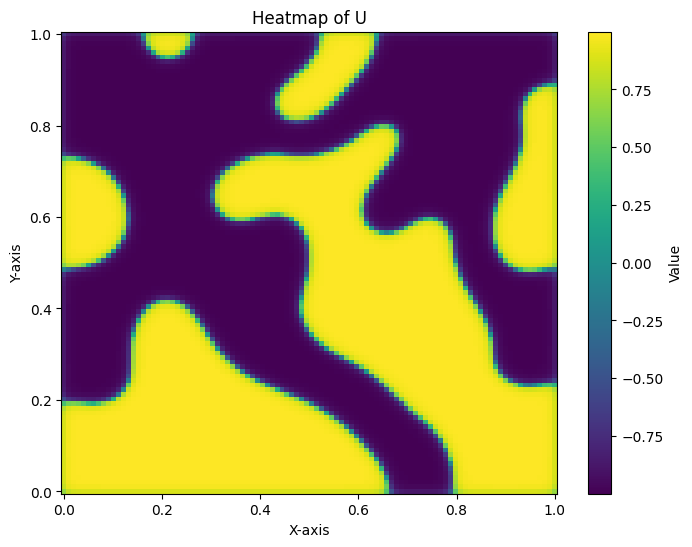

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data for demonstration
# x, y = 1D arrays for axis values
# U = 2D array with values

plt.figure(figsize=(8, 6))
plt.pcolormesh(xx, yy, U, shading='auto', cmap='viridis')  # Shading 'auto' prevents visual artifacts
plt.colorbar(label='Value')  # Add a color bar to show value scale
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Heatmap of U')
plt.show()
